In [103]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt

In [104]:


df = pd.read_csv(os.path.join("merged", "emotional_abs_merged.csv"))

list(df.columns)

['Unnamed: 0',
 'SA2_MAINCODE_2016',
 'D_0_4_FPEFT_MPEFT',
 'D_0_4_FPEFT_MPEPT',
 'D_0_4_FPEFT_MPEAW',
 'D_0_4_FPEFT_MPEHNS',
 'D_0_4_FPEFT_MPET',
 'D_0_4_FPEFT_MPULFTW',
 'D_0_4_FPEFT_MPULPTW',
 'D_0_4_FPEFT_MPUT',
 'D_0_4_FPEFT_MPTLF',
 'D_0_4_FPEFT_MPNLF',
 'D_0_4_FPEFT_MPLFSNS',
 'D_0_4_FPEFT_T',
 'D_0_4_FPEPT_MPEFT',
 'D_0_4_FPEPT_MPEPT',
 'D_0_4_FPEPT_MPEAW',
 'D_0_4_FPEPT_MPEHNS',
 'D_0_4_FPEPT_MPET',
 'D_0_4_FPEPT_MPULFTW',
 'D_0_4_FPEPT_MPULPTW',
 'D_0_4_FPEPT_MPUT',
 'D_0_4_FPEPT_MPTLF',
 'D_0_4_FPEPT_MPNLF',
 'D_0_4_FPEPT_MPLFSNS',
 'D_0_4_FPEPT_T',
 'D_0_4_FPEAW_MPEFT',
 'D_0_4_FPEAW_MPEPT',
 'D_0_4_FPEAW_MPEAW',
 'D_0_4_FPEAW_MPEHNS',
 'D_0_4_FPEAW_MPET',
 'D_0_4_FPEAW_MPULFTW',
 'D_0_4_FPEAW_MPULPTW',
 'D_0_4_FPEAW_MPUT',
 'D_0_4_FPEAW_MPTLF',
 'D_0_4_FPEAW_MPNLF',
 'D_0_4_FPEAW_MPLFSNS',
 'D_0_4_FPEAW_T',
 'D_0_4_FPHNS_MPEFT',
 'D_0_4_FPHNS_MPEPT',
 'D_0_4_FPHNS_MPEAW',
 'D_0_4_FPHNS_MPEHNS',
 'D_0_4_FPHNS_MPET',
 'D_0_4_FPHNS_MPULFTW',
 'D_0_4_FPHNS_MPULPTW',
 'D_0_4_FP

In [105]:
sample_df = df.drop(columns = ["Unnamed: 0", "SA2_MAINCODE_2016", "SA2_name", "name", 
                              "total", "at_risk", "on_track", "vulnerable_percentage",
                              "Index of Relative Socio-economic Disadvantage_decile",
                              "Index of Relative Socio-economic Adv and Disadv_decile",
                              "Index of Economic Resources_decile",
                              "Index of Education and Occupation_decile"
                               ])

In [106]:
target = sample_df["vulnerable"]

In [107]:
data = sample_df.drop("vulnerable", axis=1)
feature_names = data.columns
data

,D_0_4_FPEFT_MPEFT,D_0_4_FPEFT_MPEPT,D_0_4_FPEFT_MPEAW,D_0_4_FPEFT_MPEHNS,D_0_4_FPEFT_MPET,D_0_4_FPEFT_MPULFTW,D_0_4_FPEFT_MPULPTW,D_0_4_FPEFT_MPUT,D_0_4_FPEFT_MPTLF,D_0_4_FPEFT_MPNLF,...,Total_Lone_Parents_Total_Labour_Force,Total_Lone_Parents_Not_In_The_Labour_Force,Total_Lone_Parents_Labour_Force_Status_Not_Stated,Total_Lone_Parents_Total,Index of Relative Socio-economic Disadvantage_score,Index of Relative Socio-economic Adv and Disadv_score,Index of Economic Resources_score,Index of Education and Occupation_score,Usual Resident Population,code
0,64,12,0,3,74,0,0,0,78,3,...,34,47,0,82,1045,1025,1037,1022.0,11654.0,21001
1,49,10,0,0,59,0,0,0,59,0,...,39,35,0,77,1035,1037,975,1088.0,12046.0,21002
2,86,16,0,0,107,3,0,3,104,9,...,87,110,0,198,999,983,972,1010.0,23083.0,21003
3,66,15,3,0,88,4,3,5,92,10,...,126,261,5,388,926,912,904,946.0,24231.0,21004
4,30,0,0,0,34,0,0,0,32,3,...,9,17,0,29,1066,1051,1048,1065.0,7153.0,21005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,9,0,0,0,10,0,0,0,10,0,...,12,3,0,14,995,976,988,1010.0,3429.0,21476
423,35,3,0,0,39,0,0,0,39,3,...,19,14,0,34,1008,995,1037,1003.0,6648.0,21477
424,39,3,0,3,45,0,0,0,45,3,...,24,27,0,50,1020,998,1026,1009.0,9432.0,21478
425,67,12,0,0,84,3,0,3,89,16,...,80,131,7,217,986,958,976,952.0,21097.0,21479


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=42)

In [109]:
X_train.head()

,D_0_4_FPEFT_MPEFT,D_0_4_FPEFT_MPEPT,D_0_4_FPEFT_MPEAW,D_0_4_FPEFT_MPEHNS,D_0_4_FPEFT_MPET,D_0_4_FPEFT_MPULFTW,D_0_4_FPEFT_MPULPTW,D_0_4_FPEFT_MPUT,D_0_4_FPEFT_MPTLF,D_0_4_FPEFT_MPNLF,...,Total_Lone_Parents_Total_Labour_Force,Total_Lone_Parents_Not_In_The_Labour_Force,Total_Lone_Parents_Labour_Force_Status_Not_Stated,Total_Lone_Parents_Total,Index of Relative Socio-economic Disadvantage_score,Index of Relative Socio-economic Adv and Disadv_score,Index of Economic Resources_score,Index of Education and Occupation_score,Usual Resident Population,code
66,27,3,0,0,32,0,0,0,32,0,...,28,12,0,35,1012,990,986,1020.0,8154.0,21069
132,102,15,0,0,116,5,0,5,121,5,...,24,11,0,34,1094,1126,1013,1168.0,15166.0,21152
223,91,7,0,0,97,0,0,0,101,3,...,38,45,0,90,1044,1021,1064,986.0,12715.0,21240
31,19,4,0,0,23,0,0,0,23,0,...,9,27,0,40,994,967,1028,959.0,4363.0,21032
84,34,5,3,0,38,0,0,0,39,3,...,37,84,0,123,983,961,991,952.0,11401.0,21094


In [110]:
X_test
y_test

419     3
75      7
177    15
30      8
358    51
       ..
376    23
57      1
124    24
24     15
17     25
Name: vulnerable, Length: 86, dtype: int64

In [111]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100) # parameters of the model - change estimators to see if you can get a better outcome

### Scaling

In [112]:
X_train_df = X_train.drop(columns=["code"])
X_test_df = X_test.drop(columns=["code"])

In [113]:
# Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data.
# If working with different units of measurement - allows us to 
# standardised the scaling - reduces the magnitude of numbers while still maintaining the
# truth of the relative distance between our numerical observations
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train_df)
y_scaler = StandardScaler().fit(y_train.to_numpy().reshape(-1, 1))

# when you express different attributes on different scales of magnitude - for the scales
# that result in bigger numbers - your machine learning algorithm may hon in
# on those bigger values because there is more variety within that column - to remove
# that biasing effect of these large numbers we rescale our values - reduce the amount of 
# variety in that column between the largest value and the smallest value.
# reducing the magnitude of the variance within our data.

In [114]:
# general standard when building a model is to apply some scaling. (mm and kg - rescale mm to m)
# Create versions of our x and y data that have been rescaled
X_train_scaled = X_scaler.transform(X_train_df)
X_test_scaled = X_scaler.transform(X_test_df) # apply same trasformation/scaling to our test data
y_train_scaled = y_scaler.transform(y_train.to_numpy().reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.to_numpy().reshape(-1, 1))

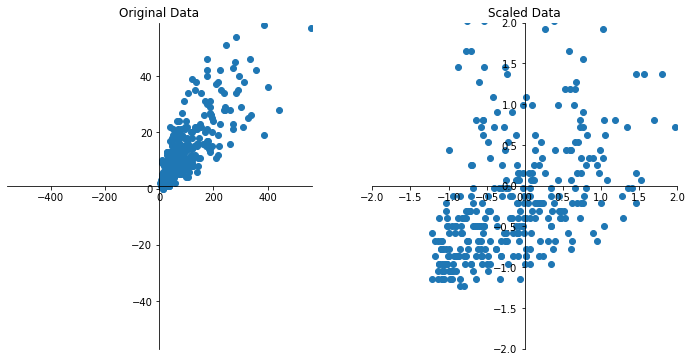

In [115]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Total_Lone_Parents_Total"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Total_Lone_Parents_Total"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])
# scaled data - same shape just reduced the space that our values fall into - more compact
# rescaling the data - still preserves the underlying truth of the data
# relative positioning of our data remains true

In [116]:
rf = rf.fit(X_train_scaled, y_train)

In [117]:
# These are the predictor values
# y_test - values you already know
predict_values = rf.predict(X_test_scaled)
len(predict_values)


86

In [118]:
predict_values

array([ 4.89, 10.16, 17.96,  4.84, 37.21,  9.55, 14.54,  7.66,  5.39,
       15.75, 29.48, 22.54,  4.76,  4.06, 17.15, 12.76, 26.67,  3.11,
        7.22,  3.07, 11.99, 23.46,  8.91, 13.39,  9.76, 11.25, 12.14,
        5.38,  9.47, 22.44,  6.17, 15.31, 10.14,  6.09,  3.32, 22.32,
       10.54,  5.56, 14.02,  5.98, 25.72,  5.34,  8.83, 17.75,  8.53,
       10.12,  5.45, 18.4 ,  7.11,  2.99, 10.31,  5.27, 14.38, 10.79,
       12.08,  9.37, 34.04,  5.66, 12.7 , 10.9 ,  5.33, 16.22,  5.41,
        3.59, 33.46,  7.26,  7.55, 13.5 , 12.71, 16.49, 26.16, 10.5 ,
        9.09, 12.48, 21.07,  5.59,  7.06, 16.79, 14.53,  9.5 , 10.42,
       20.24,  2.92, 17.88, 18.77, 29.34])

In [119]:
X_test.head(2)

,D_0_4_FPEFT_MPEFT,D_0_4_FPEFT_MPEPT,D_0_4_FPEFT_MPEAW,D_0_4_FPEFT_MPEHNS,D_0_4_FPEFT_MPET,D_0_4_FPEFT_MPULFTW,D_0_4_FPEFT_MPULPTW,D_0_4_FPEFT_MPUT,D_0_4_FPEFT_MPTLF,D_0_4_FPEFT_MPNLF,...,Total_Lone_Parents_Total_Labour_Force,Total_Lone_Parents_Not_In_The_Labour_Force,Total_Lone_Parents_Labour_Force_Status_Not_Stated,Total_Lone_Parents_Total,Index of Relative Socio-economic Disadvantage_score,Index of Relative Socio-economic Adv and Disadv_score,Index of Economic Resources_score,Index of Education and Occupation_score,Usual Resident Population,code
419,27,5,0,0,30,0,0,0,30,3,...,4,11,0,19,1008,987,1038,993.0,5321.0,21473
75,24,7,0,0,30,0,0,0,32,5,...,39,37,0,73,1005,981,1013,973.0,7641.0,21078


In [120]:
y_test_output = pd.DataFrame(y_test)

In [121]:
y_test_output["code"] = X_test["code"]

In [122]:
y_test_output["predicted"] = predict_values
# y_test_output["percent_vulnerable"] = (y_test_output["vulnerable"] / X_test["Usual Resident Population"]) * 100
y_test_output.head()

,vulnerable,code,predicted
419,3,21473,4.89
75,7,21078,10.16
177,15,21199,17.96
30,8,21031,4.84
358,51,21366,37.21


In [123]:
y_test_output.shape

(86, 3)

In [124]:
y_test_output.to_csv("predictions.csv", index=False)

In [128]:
# Mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, predict_values)

0.46239567161062833

In [129]:
results = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
results

[(0.19419095219890795, 'Female_Lone_Parent_Total'),
 (0.10107912366706055, 'Total_Lone_Parents_Total_Labour_Force'),
 (0.0938718427177142, 'Female_Lone_Parent_Total_Labour_Force'),
 (0.07134062244943046, 'Female_Lone_Parent_Not_In_The_Labour_Force'),
 (0.06829561020826719, 'Total_Lone_Parents_Total'),
 (0.04430024681427203, 'Total_Lone_Parents_Not_In_The_Labour_Force'),
 (0.02982122210303057, 'D_0_4_FPNLF_MPET'),
 (0.02971442427082656,
  'Female_Lone_Parent_Unemployed_Looking_For_Part_Time_Work'),
 (0.022724439553213502, 'Total_Lone_Parents_Total_Unemployed'),
 (0.01706739892097745, 'D_0_4_FPNLF_T'),
 (0.014309033383033824,
  'Total_Lone_Parents_Unemployed_Looking_For_Part_Time_Work'),
 (0.010917067959211295, 'D_0_4_FPT_MPEFT'),
 (0.010627376108248987, 'D_0_4_FPNLF_MPTLF'),
 (0.009257464073158974, 'D_0_4_FPT_T'),
 (0.009119357802867626, 'D_0_4_FPT_MPEPT'),
 (0.008919527838840938, 'D_0_4_FPEPT_MPNLF'),
 (0.007381009469797842, 'Female_Lone_Parent_Total_Employed'),
 (0.007303357802663398,

In [130]:
sum_results = 0
for i in results:
    sum_results += i[0]
    
sum_results

1.0000000000000002